In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

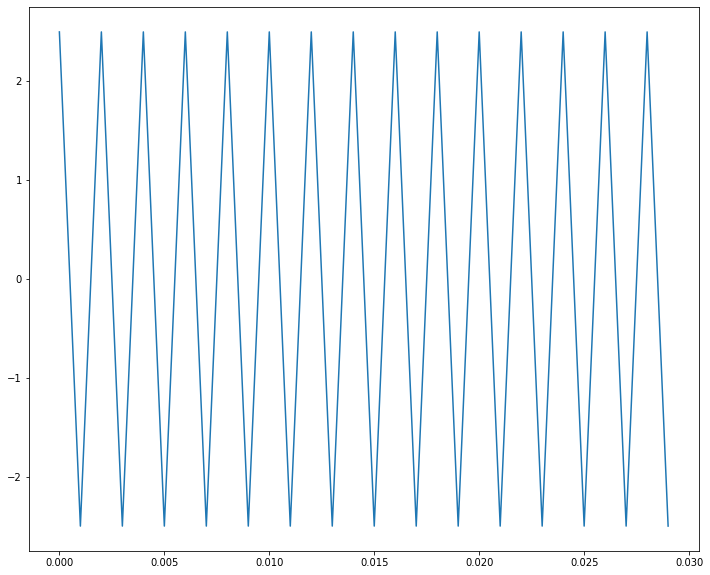

In [191]:
points = np.ones(1000)*2.5
points[1::2] *= -1
time = np.arange(0, 1, 1/1000)
t0 = time
p0 = points

plt.figure(figsize=(12,10))
plt.plot(time[0:30], points[0:30])
plt.show()

In [192]:
points_per_half_cycle = 5

In [193]:
pair_of_points = zip(time[:-1], time[1:], points[:-1], points[1:],)
df = pd.DataFrame({"pair_of_points": pair_of_points})

In [194]:
def get_intermediate_points(tuple_of_two_pairs, number_of_points):
    x1, x2, y1, y2 = tuple_of_two_pairs
    if x1 == x2:
        print(x1, x2, y1, y2)
    time_points = np.linspace(x1, x2, number_of_points)
    y_points = np.cos(np.linspace(0, np.pi, number_of_points))*np.sign(y1)*abs(y1 - y2)/2
    return {"t": time_points, "p": y_points}

In [195]:
number_of_points = 10

In [196]:
df["pontos"] = np.vectorize(get_intermediate_points)(df["pair_of_points"].to_numpy(), number_of_points)

In [197]:
df["time"] = df['pontos'].apply(lambda x: x.get("t").tolist())

In [198]:
df["points"] = df['pontos'].apply(lambda x: x.get("p").tolist())

In [199]:
time = np.array(df["time"].tolist()).reshape(-1)

In [200]:
pontos = np.array(df["points"].tolist()).reshape(-1)

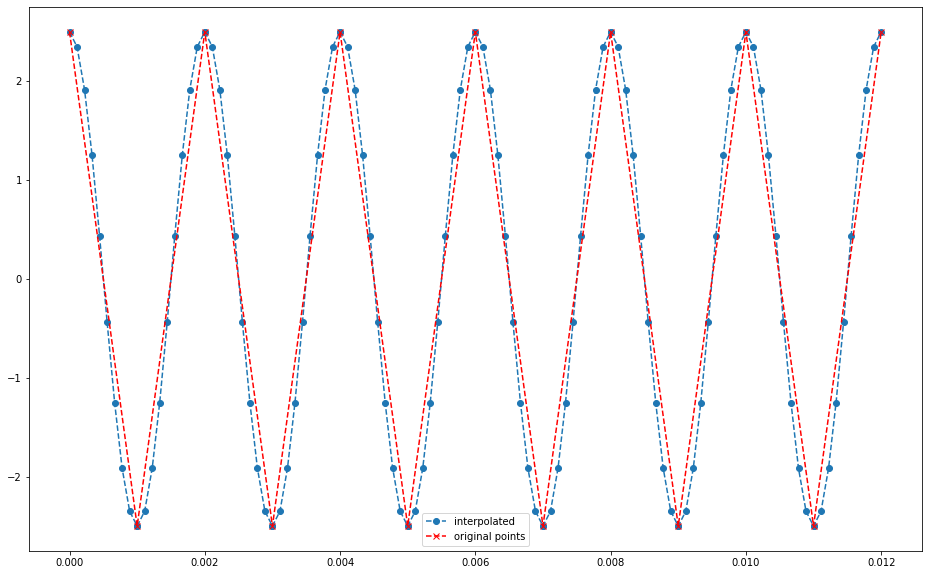

In [201]:
plt.figure(figsize=(16,10))
plt.plot(time[0:120], pontos[0:120], "--o", label='interpolated')
plt.plot(t0[0:13], p0[0:13], '--x', color='red', label='original points')
plt.legend()
plt.show()